# lec4

## import data

The data is from [zillow](https://www.zillow.com)

In [2]:
import pandas as pd

df = pd.read_csv("s3://ia340-2024fall-2-237574/house_price_raw.csv")

df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0


In [3]:
df.shape

(120, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          120 non-null    int64  
 1   price       120 non-null    int64  
 2   bedroom     67 non-null     float64
 3   bathroom    67 non-null     float64
 4   house_type  120 non-null    object 
 5   lot_size    120 non-null    int64  
 6   built_in    68 non-null     float64
 7   area        66 non-null     float64
 8   days        120 non-null    int64  
 9   views       120 non-null    int64  
 10  hoa         120 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 10.4+ KB


In [5]:
df['price']

0      169900
1       79900
2      229900
3      149900
4      229900
        ...  
115    741000
116    780000
117     74900
118    349000
119    370000
Name: price, Length: 120, dtype: int64

In [6]:
df.sort_values(by='price')

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
58,1049,0,5.0,3.5,single-family home,23522,1987.0,NaN,83,155,0
30,1021,0,3.0,2.5,townhouse,1671,1994.0,1160.0,73,63,0
112,1103,0,3.0,3.0,single-family home,79279,1985.0,NaN,84,66,0
17,1008,69900,NaN,NaN,lot or land,8712,NaN,NaN,77,292,55
117,1108,74900,NaN,NaN,lot or land,204732,NaN,NaN,84,100,0
...,...,...,...,...,...,...,...,...,...,...,...
19,1010,699900,5.0,6.0,single-family home,18295,2007.0,5955.0,75,100,0
115,1106,741000,NaN,NaN,lot or land,2482920,NaN,NaN,20,0,0
116,1107,780000,NaN,NaN,lot or land,2613600,NaN,NaN,20,0,0
34,1025,1100000,3.0,2.0,single-family home,4356000,1970.0,2541.0,20,58,0


In [7]:
df[0:5]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0


In [8]:
df['house_type'].value_counts()

house_type
lot or land           52
single-family home    38
townhouse             15
condo                 14
multi-family           1
Name: count, dtype: int64

In [9]:
df[df['house_type']=='single-family home']

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0
5,996,359000,5.0,4.0,single-family home,10130,1997.0,2903.0,79,951,0
8,999,394000,3.0,2.0,single-family home,18295,2001.0,2616.0,73,709,0
9,1000,349900,3.0,2.0,single-family home,204732,1967.0,3850.0,42,366,0
11,1002,148500,3.0,1.0,single-family home,9147,1959.0,1000.0,17,328,0
13,1004,265000,3.0,3.0,single-family home,13939,1998.0,2705.0,12,362,0
15,1006,429000,4.0,5.0,single-family home,7405,2017.0,2799.0,75,569,100
16,1007,309900,3.0,3.0,single-family home,15246,1986.0,2136.0,6,173,0


In [11]:
df['year'] = pd.to_datetime(df['built_in'], format='%Y')
df.head()

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa,year
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243,2008-01-01
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250,1986-01-01
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0,2002-01-01
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0,1975-01-01
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0,1988-01-01


In [12]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 113
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          65 non-null     int64         
 1   price       65 non-null     int64         
 2   bedroom     65 non-null     float64       
 3   bathroom    65 non-null     float64       
 4   house_type  65 non-null     object        
 5   lot_size    65 non-null     int64         
 6   built_in    65 non-null     float64       
 7   area        65 non-null     float64       
 8   days        65 non-null     int64         
 9   views       65 non-null     int64         
 10  hoa         65 non-null     int64         
 11  year        65 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 6.6+ KB


In [16]:
df['unit_price']= df['price']/df['area']
df.head()

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa,year,unit_price
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243,2008-01-01,121.704871
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250,1986-01-01,78.952569
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0,2002-01-01,149.188838
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0,1975-01-01,82.817680
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0,1988-01-01,157.898352


In [13]:
df['price'].mean()

294944.76923076925

In [14]:
df.groupby('house_type')['price'].mean()

house_type
condo                 153425.000000
single-family home    378236.111111
townhouse             227130.666667
Name: price, dtype: float64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

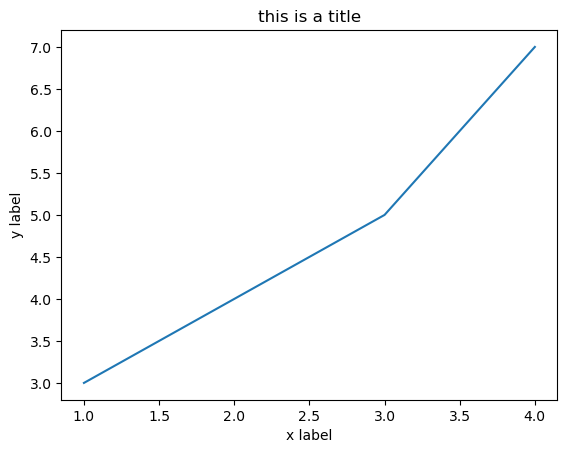

In [17]:
x = [1,2,3,4]
y = [3,4,5,7]
plt.plot(x,y)
plt.title('this is a title')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

<Axes: xlabel='year'>

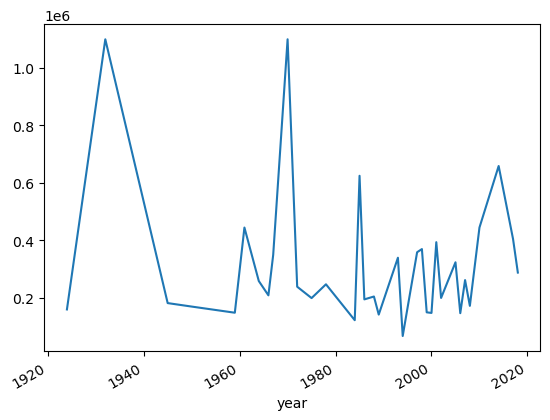

In [18]:
avg_price_per_year= df.groupby('year')['price'].mean()
avg_price_per_year.plot()

Matplotlib is building the font cache; this may take a moment.


<Axes: >

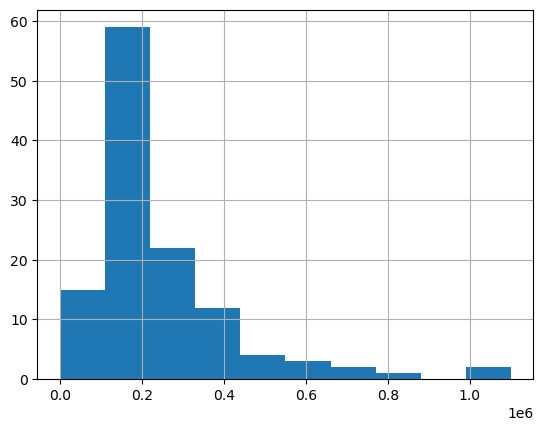

In [3]:
df['price'].hist()

<Axes: xlabel='house_type'>

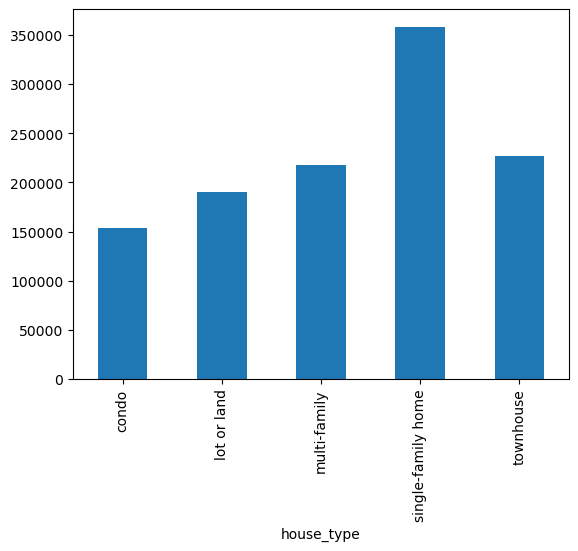

In [4]:
avg_price_per_type = df.groupby('house_type')['price'].mean()
avg_price_per_type.plot.bar()

<Axes: xlabel='area', ylabel='price'>

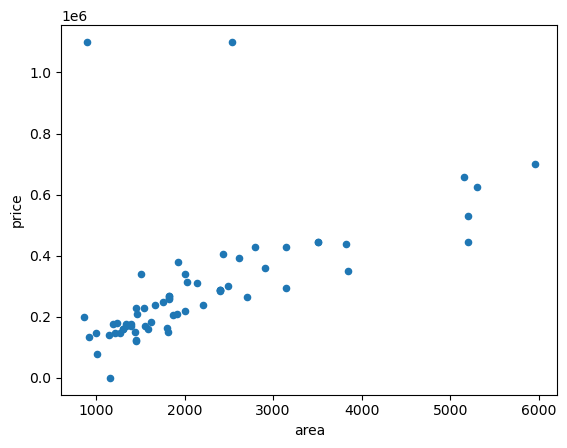

In [5]:
df.plot.scatter(x='area', y='price')